c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 25ms/step - accuracy: 0.9072 - loss: 0.2983 - val_accuracy: 0.9836 - val_loss: 0.0499
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9873 - loss: 0.0429 - val_accuracy: 0.9894 - val_loss: 0.0326
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9912 - loss: 0.0269 - val_accuracy: 0.9881 - val_loss: 0.0353
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9891 - val_loss: 0.0380
313/313 - 3s - 8ms/step - accuracy: 0.9891 - loss: 0.0380
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
MAE: 0.0439, MSE: 0.2337, RMSE: 0.4834252786108728
Test Loss: 0.038019340485334396, Test Accuracy: 0.9890999794006348


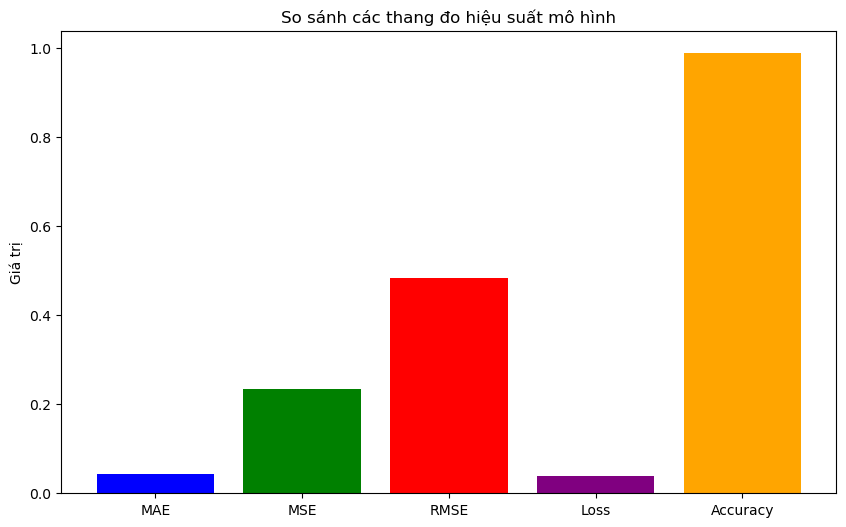

In [1]:
# 1. Mô hình CNN với tệp dữ liệu MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu
x_train, x_test = x_train / 255.0, x_test / 255.0

# Thêm một chiều để phù hợp với mô hình CNN
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Bước 2: Xây dựng mô hình CNN với ít nhất 5 lớp
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = np.argmax(model.predict(x_test), axis=1)

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình')
plt.ylabel('Giá trị')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 0.9090 - loss: 0.2902 - val_accuracy: 0.9847 - val_loss: 0.0426
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9870 - loss: 0.0408 - val_accuracy: 0.9881 - val_loss: 0.0342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9857 - val_loss: 0.0471
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9899 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9909 - val_loss: 0.0302
313/313 - 2s - 7ms/step - accuracy: 0.9909 - loss: 0.0302
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
MAE: 0.0355, MSE: 0.1745, RMSE: 0.41773197148410846
Test Loss: 0.030175643041729927, Test Accuracy: 0.9908999800682068


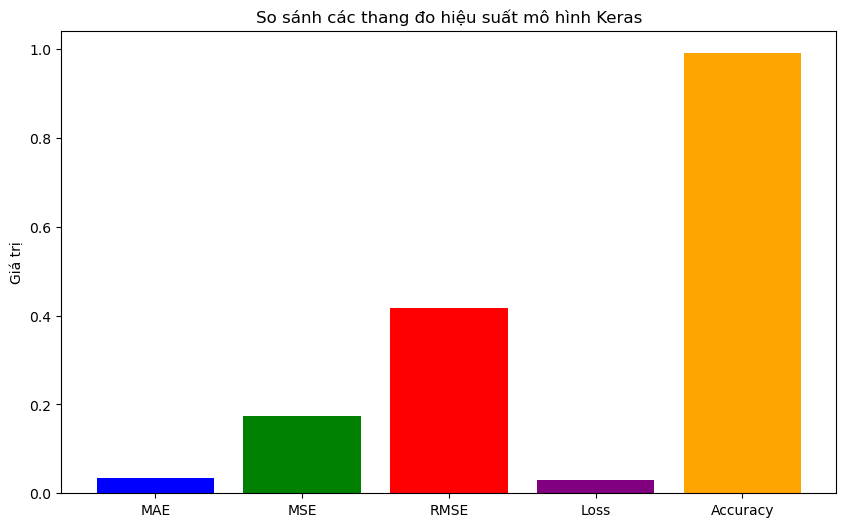

In [2]:
# 2. Mô hình Keras với tệp dữ liệu MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu
x_train, x_test = x_train / 255.0, x_test / 255.0

# Thêm một chiều để phù hợp với mô hình Keras
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Bước 2: Xây dựng mô hình Keras với ít nhất 5 lớp
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = np.argmax(model.predict(x_test), axis=1)

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình Keras')
plt.ylabel('Giá trị')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.7785 - loss: 0.6569 - val_accuracy: 0.9389 - val_loss: 0.2077
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9502 - loss: 0.1710 - val_accuracy: 0.9654 - val_loss: 0.1215
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9624 - loss: 0.1319 - val_accuracy: 0.9713 - val_loss: 0.1037
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9687 - loss: 0.1113 - val_accuracy: 0.9725 - val_loss: 0.0967
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9705 - loss: 0.1055 - val_accuracy: 0.9721 - val_loss: 0.0969
313/313 - 2s - 7ms/step - accuracy: 0.9721 - loss: 0.0969
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
MAE: 0.1064, MSE: 0.505, RMSE: 0.7106335201775947
Test Loss: 0.09688900411128998, Test Accuracy: 0.972100019454956


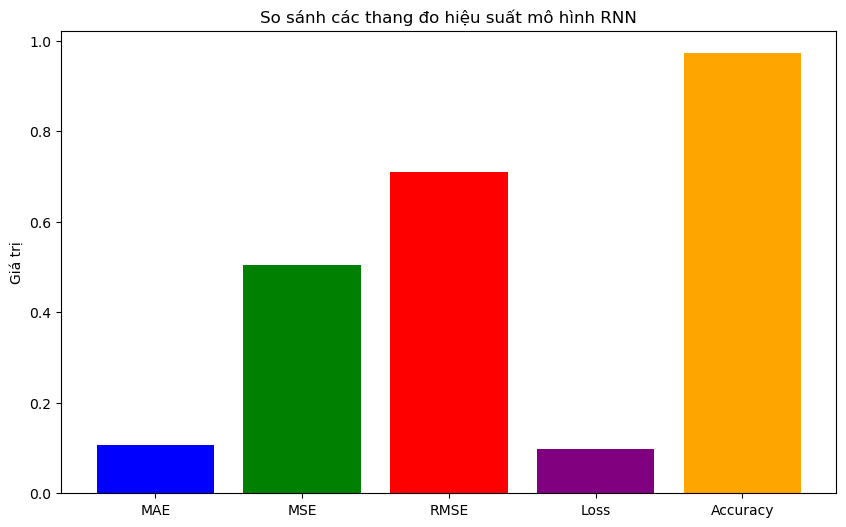

In [3]:
# 3. Mô hình RNN với tệp dữ liệu MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu
x_train, x_test = x_train / 255.0, x_test / 255.0

# Thêm một chiều để phù hợp với mô hình RNN
# Chúng ta sẽ thay đổi hình dạng dữ liệu để phù hợp với RNN
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28))

# Bước 2: Xây dựng mô hình RNN với ít nhất 5 lớp
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(28, 28), activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = np.argmax(model.predict(x_test), axis=1)

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình RNN')
plt.ylabel('Giá trị')
plt.show()


In [4]:
# 4. Mô hình CNN với tệp dữ liệu IMDB
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu IMDB
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Giới hạn độ dài của các câu và đệm thêm nếu cần
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Bước 2: Xây dựng mô hình CNN
model = models.Sequential([
    layers.Embedding(10000, 128, input_length=max_len),  # Lớp embedding
    layers.Conv1D(32, 7, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, 7, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 đầu ra cho phân loại nhị phân
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Phân loại nhị phân
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Vì là bài toán phân loại nhị phân

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình CNN trên IMDB')
plt.ylabel('Giá trị')
plt.show()


Epoch 1/5


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# 5. Mô hình Keras với tệp dữ liệu IMDB
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu IMDB
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Giới hạn độ dài của các câu và đệm thêm nếu cần
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Bước 2: Xây dựng mô hình Keras
model = models.Sequential([
    layers.Embedding(10000, 128, input_length=max_len),  # Lớp embedding
    layers.LSTM(128, return_sequences=True),  # LSTM layer
    layers.LSTM(64),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Phân loại nhị phân
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Phân loại nhị phân
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Phân loại nhị phân

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình Keras trên IMDB')
plt.ylabel('Giá trị')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
775/782 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7044 - loss: 0.5491

In [5]:
# 6. Mô hình RNN với tệp dữ liệu IMDB
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu IMDB
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Giới hạn độ dài của các câu và đệm thêm nếu cần
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Bước 2: Xây dựng mô hình RNN với ít nhất 5 lớp
model = models.Sequential([
    layers.Embedding(10000, 128, input_length=max_len),  # Lớp embedding
    layers.SimpleRNN(128, return_sequences=True),  # Lớp RNN
    layers.SimpleRNN(64),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Phân loại nhị phân
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Phân loại nhị phân
              metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán nhãn
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Phân loại nhị phân

# Tính toán MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss', 'Accuracy']
values = [mae, mse, rmse, test_loss, test_accuracy]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('So sánh các thang đo hiệu suất mô hình RNN trên IMDB')
plt.ylabel('Giá trị')
plt.show()


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 354s 436ms/step - accuracy: 0.4961 - loss: 0.7057 - val_accuracy: 0.4984 - val_loss: 0.6978
Epoch 2/5
679/782 ━━━━━━━━━━━━━━━━━━━━ 40s 391ms/step - accuracy: 0.5251 - loss: 0.6873

KeyboardInterrupt: 

In [ ]:
# 7. Mô hình CNN với tệp dữ liệu Boston Housing Price prediction
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu Boston Housing Price
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Chuẩn hóa dữ liệu
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Reshape lại dữ liệu để phù hợp với mô hình CNN
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Bước 2: Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Đầu ra là giá trị dự đoán (hồi quy)
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Sử dụng MSE cho bài toán hồi quy
              metrics=['mae'])  # MAE cũng là metric phổ biến cho hồi quy

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán giá nhà trên tập test
y_pred = model.predict(x_test)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {test_mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss']
values = [test_mae, mse, rmse, test_loss]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('So sánh các thang đo hiệu suất mô hình CNN trên Boston Housing Price')
plt.ylabel('Giá trị')
plt.show()


In [ ]:
# 8. Mô hình Keras với tệp dữ liệu Boston Housing Price prediction
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu Boston Housing Price
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Chuẩn hóa dữ liệu
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Bước 2: Xây dựng mô hình Keras
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Đầu ra là giá trị dự đoán (hồi quy)
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE cho bài toán hồi quy
              metrics=['mae'])  # Sử dụng MAE làm metric chính

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán giá nhà trên tập test
y_pred = model.predict(x_test)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {test_mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss']
values = [test_mae, mse, rmse, test_loss]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('So sánh các thang đo hiệu suất mô hình Keras trên Boston Housing Price')
plt.ylabel('Giá trị')
plt.show()


In [ ]:
# 9. Mô hình RNN với tệp dữ liệu Boston Housing Price prediction
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Bước 1: Tải và xử lý dữ liệu Boston Housing Price
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Chuẩn hóa dữ liệu
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Reshape lại dữ liệu để phù hợp với mô hình RNN
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Bước 2: Xây dựng mô hình RNN
model = models.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(1, x_train.shape[2]), return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Đầu ra là giá trị dự đoán (hồi quy)
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE cho bài toán hồi quy
              metrics=['mae'])  # Sử dụng MAE làm metric chính

# Bước 3: Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Bước 4: Đánh giá mô hình trên dữ liệu test
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)

# Dự đoán giá nhà trên tập test
y_pred = model.predict(x_test)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In ra các kết quả
print(f"MAE: {test_mae}, MSE: {mse}, RMSE: {rmse}")
print(f"Test Loss: {test_loss}")

# Bước 5: Vẽ biểu đồ so sánh các thang đo
metrics = ['MAE', 'MSE', 'RMSE', 'Loss']
values = [test_mae, mse, rmse, test_loss]

# Tạo biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('So sánh các thang đo hiệu suất mô hình RNN trên Boston Housing Price')
plt.ylabel('Giá trị')
plt.show()
